In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('/Users/fatimahalshammari/Downloads/Project/student-mat.csv')

In [3]:
data = data.rename(columns={'sex': 'gender'})

In [4]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot:>

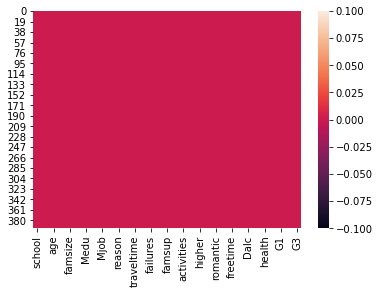

In [7]:
sns.heatmap(data.isnull())

In [8]:
data['avg_score'] = data[['G1','G2']].mean(axis=1)
data.drop(['G1','G2'], axis=1,inplace=True)
data.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,8.0


In [9]:
data[data['G3']>20]

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_score


In [10]:
def pass_fail(grade):
    if grade >=12:
        return 0
    else:
        return 1

In [11]:
data['pass_fail'] = data['G3'].apply(pass_fail)

(array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

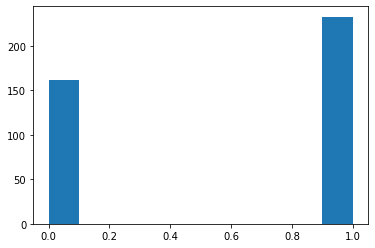

In [12]:
plt.hist(data['pass_fail'])

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='G3'>

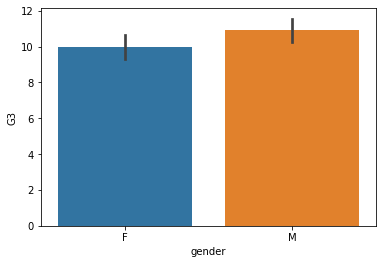

In [13]:
sns.barplot(data['gender'],data['G3'])

(array([208.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

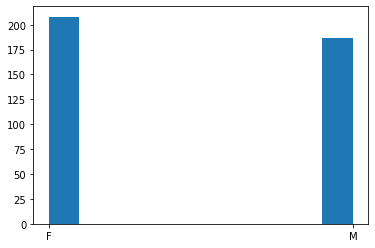

In [14]:
plt.hist(data['gender'])

In [15]:
data['gender'].value_counts()

F    208
M    187
Name: gender, dtype: int64

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G3', ylabel='absences'>

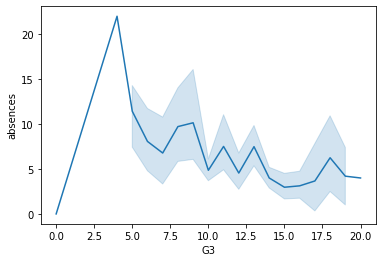

In [16]:
sns.lineplot(data['G3'],data['absences'])

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

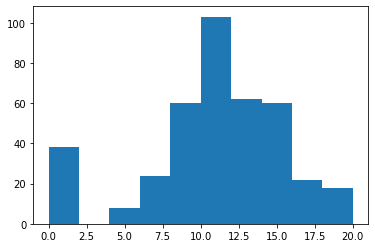

In [17]:
plt.hist(data['G3'])

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health', ylabel='absences'>

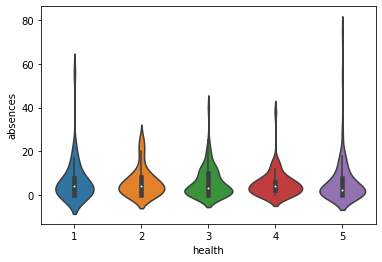

In [18]:
sns.violinplot(data['health'],data['absences'])

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health', ylabel='absences'>

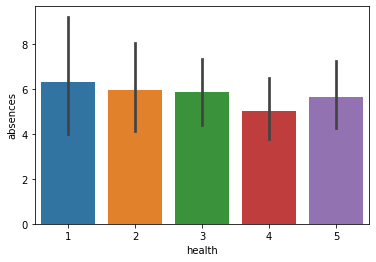

In [19]:
sns.barplot(data['health'],data['absences'])

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='higher', ylabel='count'>

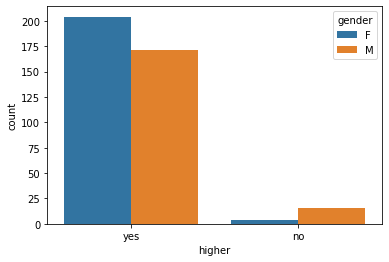

In [20]:
sns.countplot(data['higher'],hue=data['gender'])

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='internet', ylabel='G3'>

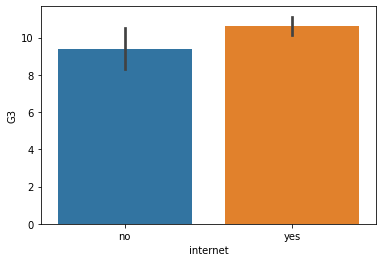

In [21]:
sns.barplot(data['internet'],data['G3'])

Text(0.5, 0, 'Mother education')

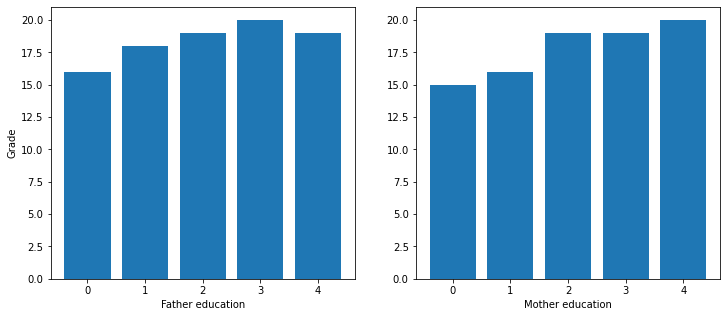

In [22]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Fedu'],data['G3'])
ax1.set_xlabel('Father education')
ax1.set_ylabel('Grade')
ax2.bar(data['Medu'],data['G3'])
ax2.set_xlabel('Mother education')

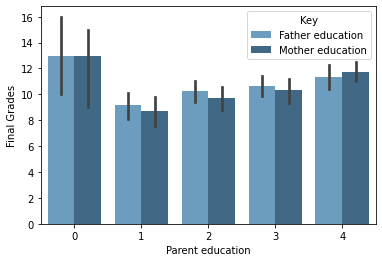

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.DataFrame({'Parent education': data['Fedu'],'Final Grades': data['G3']})
df2=pd.DataFrame({'Parent education': data['Medu'],'Final Grades': data['G3']})
df1['Key']='Father education'
df2['Key']='Mother education'
res=pd.concat([df1,df2])
sns.barplot(x='Parent education',y='Final Grades',data=res,hue='Key',palette="Blues_d")
plt.show()

In [24]:
len(data[(data['pass_fail'] == 'pass') & (data['Fedu'] == 4)])

0

yes    314
no      81
Name: nursery, dtype: int64


Text(0, 0.5, 'Counts')

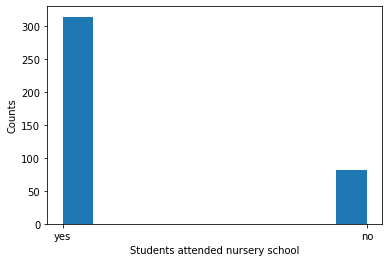

In [25]:
plt.hist(data['nursery'])
print(data['nursery'].value_counts())
plt.xlabel('Students attended nursery school')
plt.ylabel('Counts')

Text(0, 0.5, 'Final Grades')

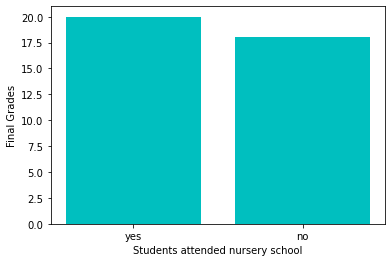

In [26]:
plt.bar(data['nursery'],data['G3'],color='c')
plt.xlabel('Students attended nursery school')
plt.ylabel('Final Grades')

Text(0.5, 0, 'number of past class failures')

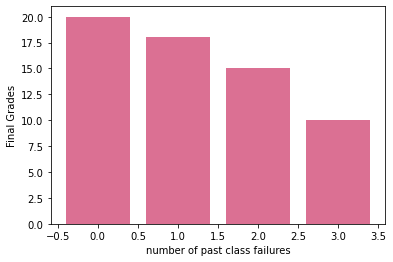

In [27]:
plt.bar(data['failures'],data['G3'],color='palevioletred')
plt.ylabel('Final Grades')
plt.xlabel('number of past class failures')

Text(0.5, 0, ' weekend alcohol consumption')

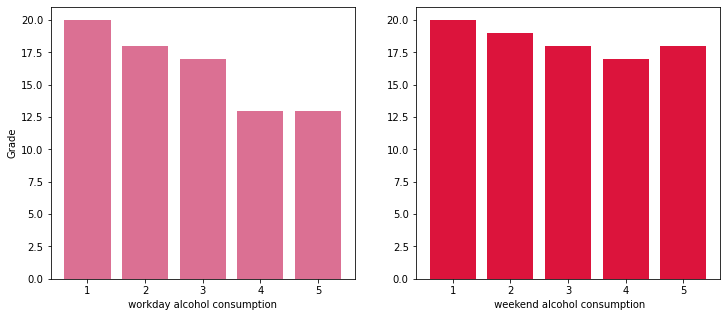

In [28]:
# عيب
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Dalc'],data['G3'],color='palevioletred')
ax1.set_xlabel(' workday alcohol consumption ') #(numeric: from 1 - very low to 5 - very high)
ax1.set_ylabel('Grade')
ax2.bar(data['Walc'],data['G3'],color='crimson')
ax2.set_xlabel(' weekend alcohol consumption') #(numeric: from 1 - very low to 5 - very high)

<BarContainer object of 395 artists>

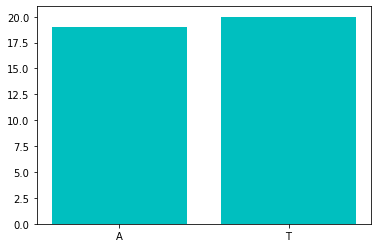

In [29]:
plt.bar(data['Pstatus'],data['G3'],color='c')

In [30]:
len(data[data['Pstatus']=='A'])

41

In [31]:
len(data[data['Pstatus']=='T'])

354

In [32]:
(len(data[(data['Pstatus']=='A') & (data['pass_fail'] == 'fail')])*100)/41

0.0

In [33]:
(len(data[(data['Pstatus']=='A') & (data['pass_fail'] == 'pass')])*100)/41

0.0

In [34]:
(len(data[(data['Pstatus']=='T') & (data['pass_fail'] == 'fail')])*100)/354

0.0

In [35]:
(len(data[(data['Pstatus']=='T') & (data['pass_fail'] == 'pass')])*100)/354

0.0

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'avg_score']], data[['pass_fail']], test_size=0.3, random_state=42)

train_df = pd.concat([X_train,y_train] , axis=1 )


mother    273
father     90
other      32
Name: guardian, dtype: int64


Text(0, 0.5, 'Counts')

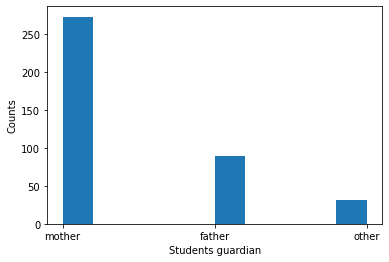

In [37]:
plt.hist(data['guardian'])
print(data['guardian'].value_counts())
plt.xlabel('Students guardian')
plt.ylabel('Counts')

Text(0.5, 0, ' Father Education')

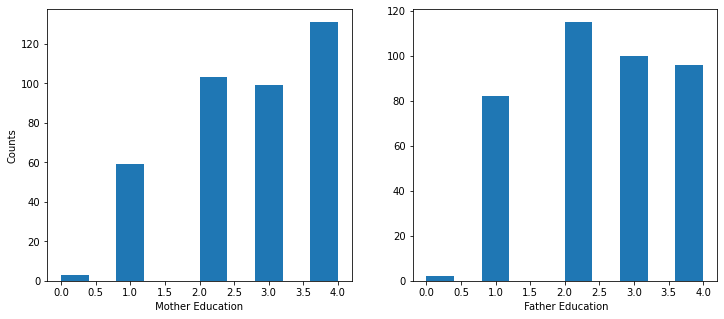

In [38]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.hist(data['Medu'])
ax1.set_xlabel(' Mother Education ') #(numeric: from 1 - very low to 5 - very high)
ax1.set_ylabel('Counts')
ax2.hist(data['Fedu'])
ax2.set_xlabel(' Father Education') #(numeric: from 1 - very low to 5 - very high)

In [39]:
from scipy.stats import chisquare
#chisquare(train_df)


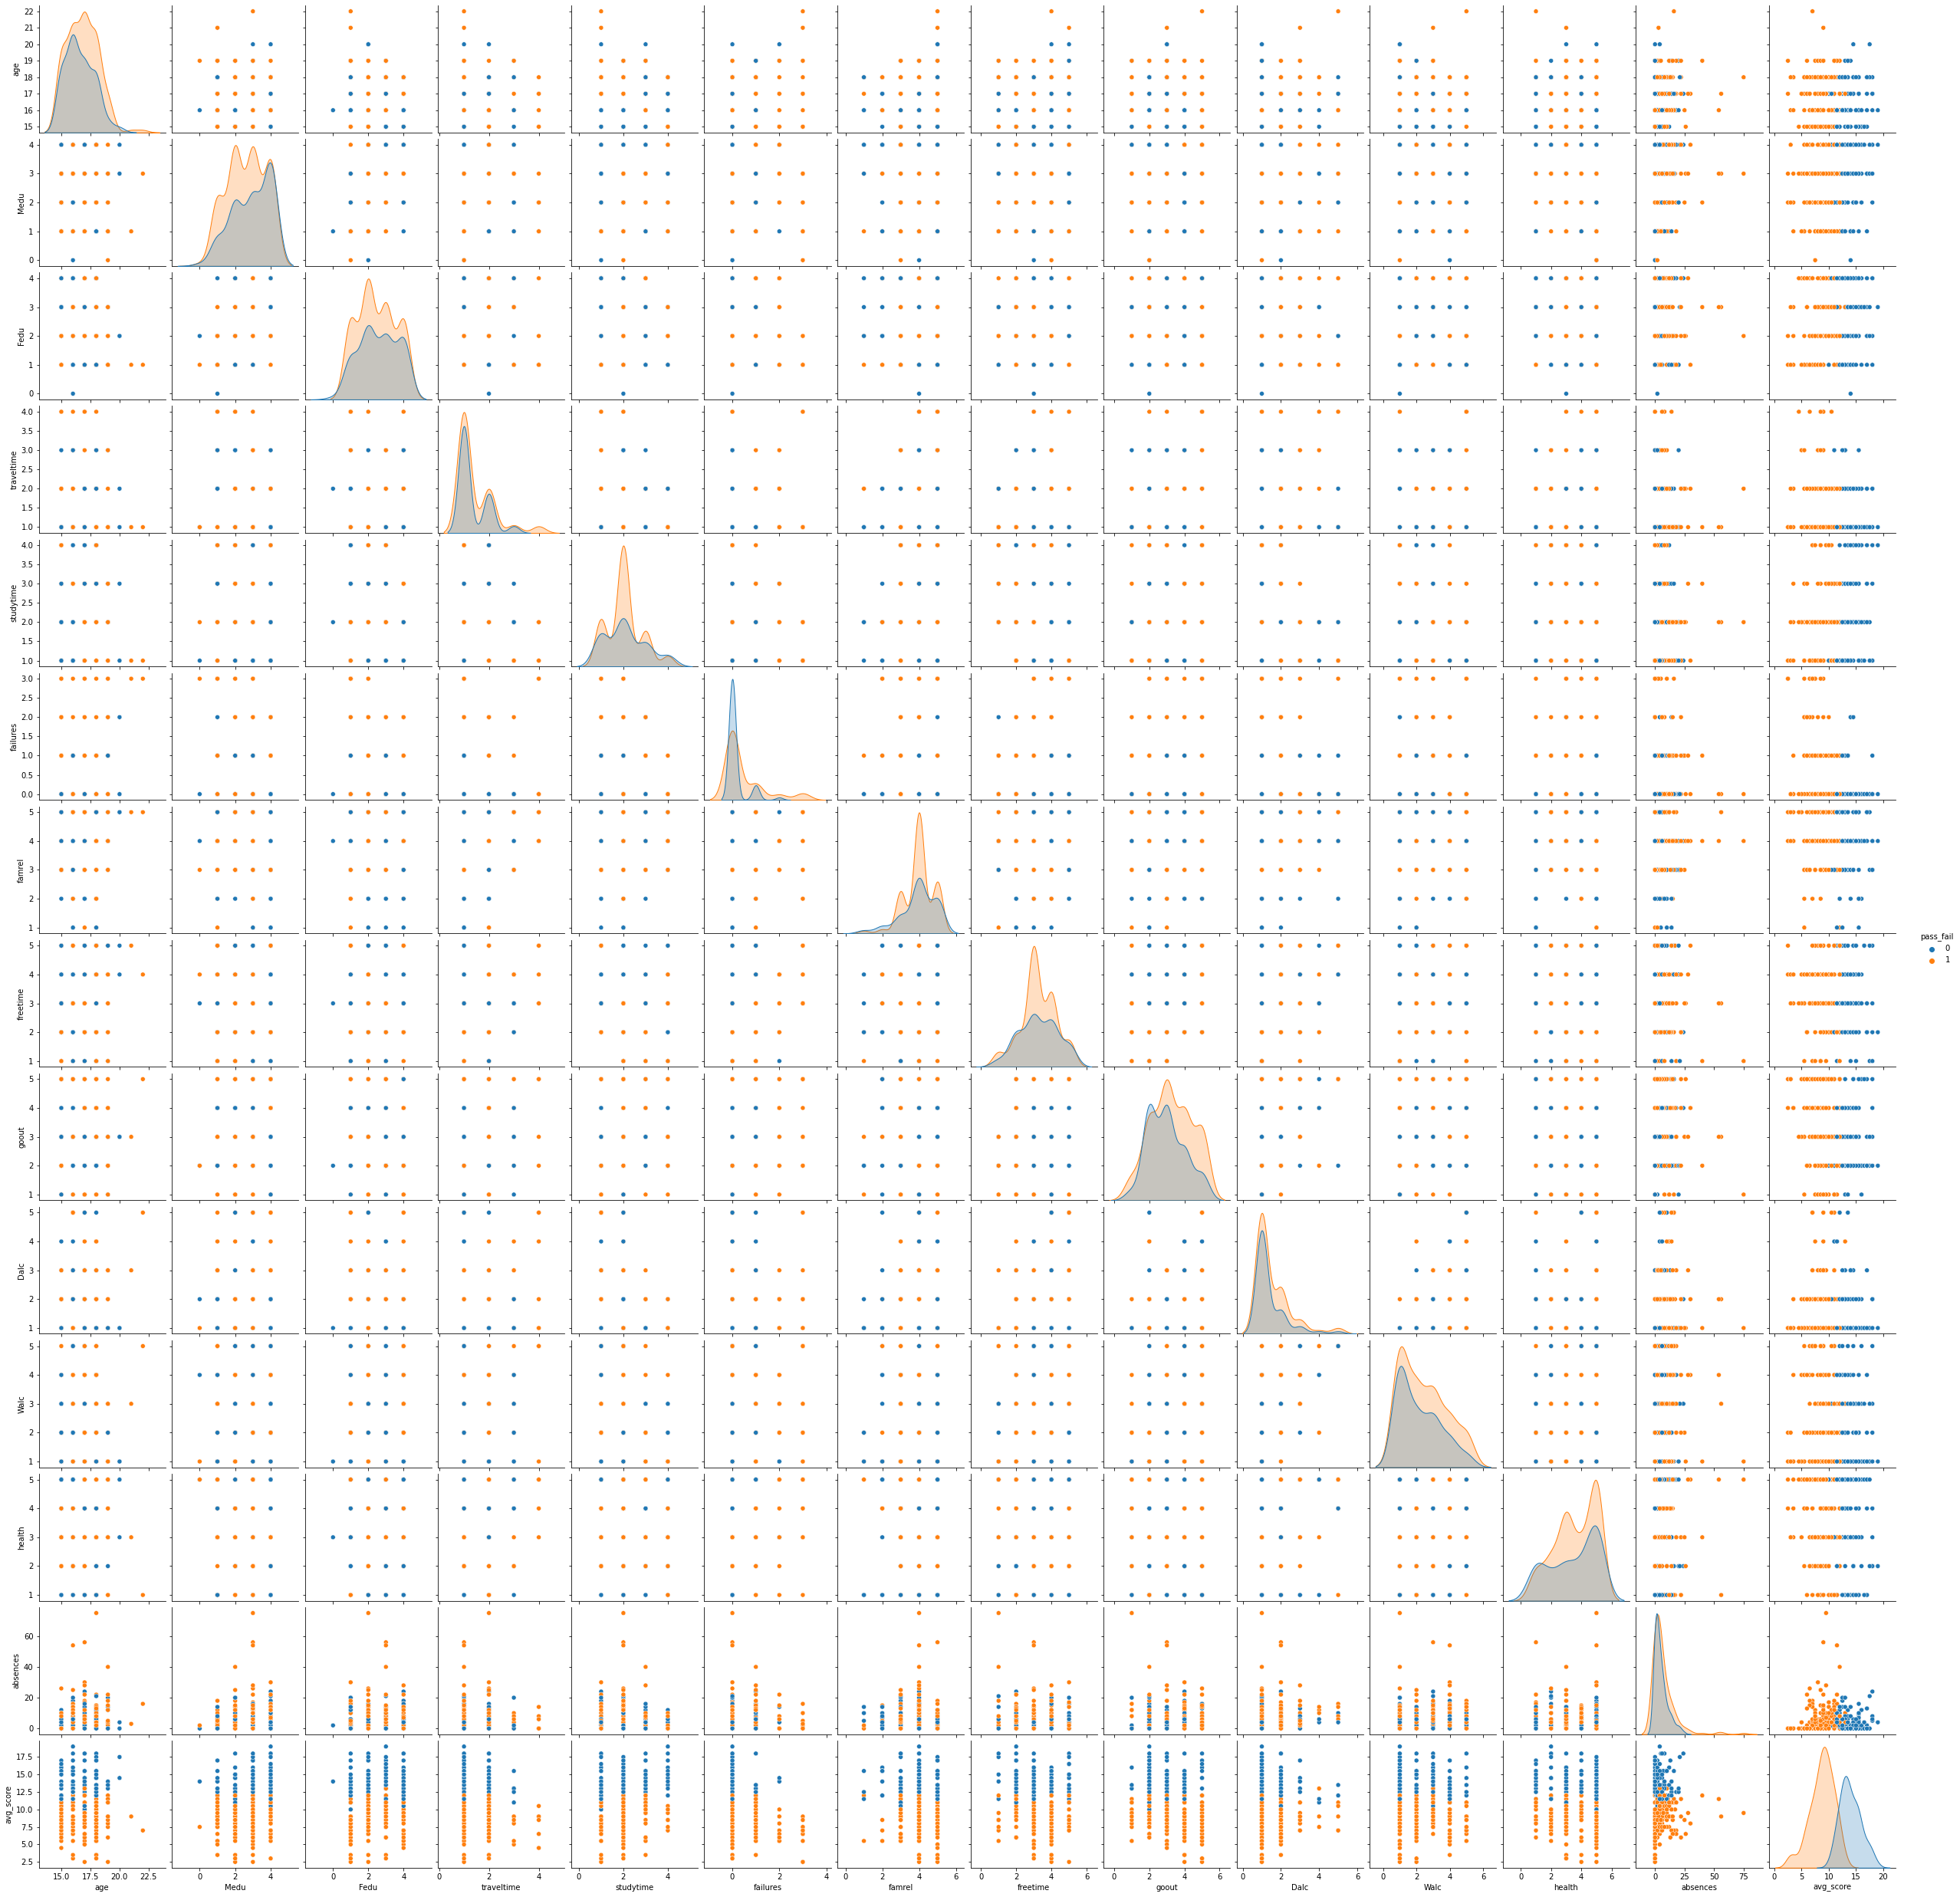

In [40]:
sns.pairplot(train_df,hue='pass_fail')

<AxesSubplot:>

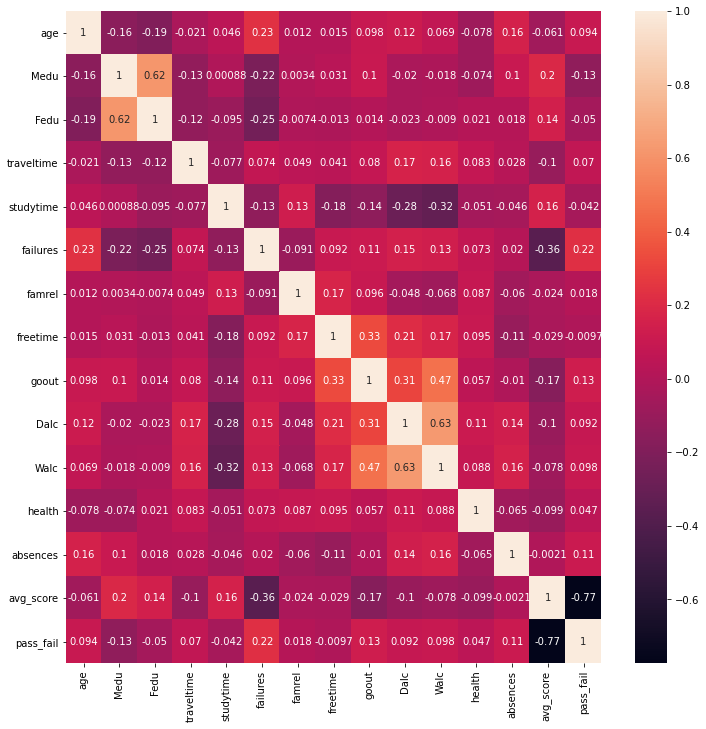

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(),annot = True)

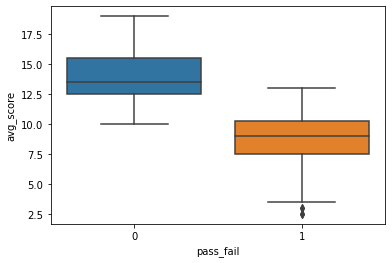

In [42]:
sns.boxplot(x='pass_fail', y='avg_score', data=train_df);

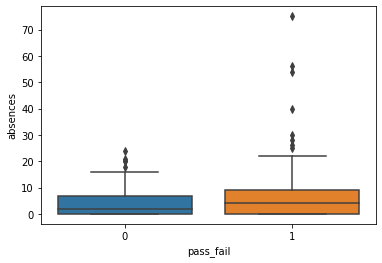

In [43]:
sns.boxplot(x='pass_fail', y='absences', data=train_df);

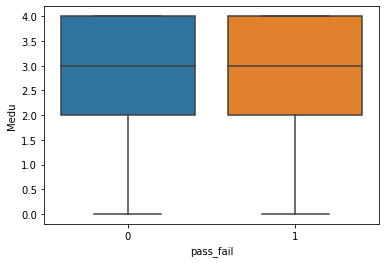

In [44]:
sns.boxplot(x='pass_fail', y='Medu', data=train_df);

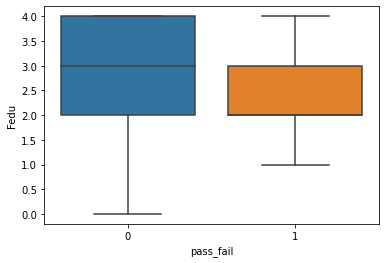

In [45]:
sns.boxplot(x='pass_fail', y='Fedu', data=train_df);

In [46]:
def convert_binary(feature):
    data[feature].replace(['yes'],['1'],inplace=True)
    data[feature].replace(['no'],['0'],inplace=True)
    data[feature] = pd.to_numeric(data[feature],errors='coerce')

In [47]:
convert_binary('activities')
convert_binary('paid')
convert_binary('nursery')
convert_binary('higher')
convert_binary('internet')
convert_binary('romantic')
convert_binary('famsup')
convert_binary('schoolsup')

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'avg_score']], data[['pass_fail']], test_size=0.3, random_state=42)

train_df = pd.concat([X_train,y_train] , axis=1 )

In [49]:
categorical_cols = [column for column in X_train.columns if (X_train[column].nunique()<=30)]
str_col = [col for col in categorical_cols if X_train[col].dtype =='O']
str_col

['school',
 'gender',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian']

In [50]:
for i in str_col:
    print(i, ' :', X_train[i].unique())

school  : ['GP' 'MS']
gender  : ['F' 'M']
address  : ['U' 'R']
famsize  : ['GT3' 'LE3']
Pstatus  : ['T' 'A']
Mjob  : ['other' 'services' 'teacher' 'at_home' 'health']
Fjob  : ['other' 'services' 'health' 'at_home' 'teacher']
reason  : ['reputation' 'course' 'home' 'other']
guardian  : ['mother' 'father' 'other']


In [51]:
X_train_Copy = X_train.copy()
X_test_Copy = X_test.copy()

In [52]:
for i in str_col:
    print(i)
    X_train = pd.concat([X_train.drop(i, axis = 1), pd.get_dummies(X_train[i], prefix=i, drop_first = True)], axis = 1)
    X_test= pd.concat([X_test.drop(i, axis = 1), pd.get_dummies(X_test[i], prefix=i, drop_first = True)], axis = 1)


school
gender
address
famsize
Pstatus
Mjob
Fjob
reason
guardian


In [53]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_score,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,6,5.5,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,6,5.0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,10,7.5,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14.5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,10,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9.0,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,16,15.0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,7,9.0,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,10,11.5,1


In [54]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3', 'avg_score', 'pass_fail'],
      dtype='object')

## Before Modeling Training - Resampling The Data

In [55]:
import imblearn.over_sampling

In [65]:
ROS

RandomOverSampler(random_state=42, sampling_strategy={0: 113, 1: 652})

In [64]:
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train['pass_fail'] == 1)
n_neg = np.sum(y_train['pass_fail'] == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 


/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (652) in class 1 will be larger than the number of samples in the majority class (class #1 -> 163)
  warnings.warn(


In [68]:
X_train, y_train = ROS.fit_resample(X_train, y_train)

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (652) in class 1 will be larger than the number of samples in the majority class (class #1 -> 163)
  warnings.warn(


## Logistic Regression

# Baseline Model 

In [69]:
subset_train_df = train_df[['avg_score','pass_fail']]

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logit = LogisticRegression(C = 1000)
logit.fit(subset_train_df[['avg_score']], subset_train_df['pass_fail'])
scoresCV = cross_val_score(logit, subset_train_df[['avg_score']], subset_train_df['pass_fail'], cv=10)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(subset_train_df[['avg_score']], subset_train_df['pass_fail'])))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))
#print("Test set: {:6.2f}%".format(100*logit.score(X_test[['avg_score']], y_test)))

The score for logistic regression is
Training:  90.58%
Cross Vlidation score: 0.91 (+/- 0.10)


# Aggregated Model 

In [71]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
scoresCV = cross_val_score(logit, X_train, y_train, cv=10)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))
#print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

The score for logistic regression is
Training:  98.04%
Cross Vlidation score: 0.97 (+/- 0.04)


/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

# Simple Aggregation Model

In [72]:
subset_train_df = train_df[['avg_score','Medu','pass_fail']]

In [73]:
logit = LogisticRegression(C = 1000)
logit.fit(subset_train_df[['avg_score','Medu']], subset_train_df['pass_fail'])
scoresCV = cross_val_score(logit, subset_train_df[['avg_score','Medu']], subset_train_df['pass_fail'], cv=10)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(subset_train_df[['avg_score','Medu']], subset_train_df['pass_fail'])))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))

The score for logistic regression is
Training:  90.58%
Cross Vlidation score: 0.91 (+/- 0.10)


In [74]:
subset_train_df = train_df[['avg_score','Fedu','pass_fail']]

In [75]:
logit = LogisticRegression(C = 1000)
logit.fit(subset_train_df[['avg_score','Fedu']], subset_train_df['pass_fail'])
scoresCV = cross_val_score(logit, subset_train_df[['avg_score','Fedu']], subset_train_df['pass_fail'], cv=10)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(subset_train_df[['avg_score','Fedu']], subset_train_df['pass_fail'])))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))

The score for logistic regression is
Training:  90.22%
Cross Vlidation score: 0.90 (+/- 0.10)


In [76]:
subset_train_df = train_df[['avg_score','Fedu','Medu','pass_fail']] 

In [77]:
logit = LogisticRegression(C = 1000)
logit.fit(subset_train_df[['avg_score','Fedu','Medu']], subset_train_df['pass_fail'])
scoresCV = cross_val_score(logit, subset_train_df[['avg_score','Fedu','Medu']], subset_train_df['pass_fail'], cv=10)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(subset_train_df[['avg_score','Fedu','Medu']], subset_train_df['pass_fail'])))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))

The score for logistic regression is
Training:  90.22%
Cross Vlidation score: 0.90 (+/- 0.09)


We will use the baseline model since the cross validation have a higher score

## KNN model

### Aggregated Model

Best K value =  1
Best score =  0.9660457963089542


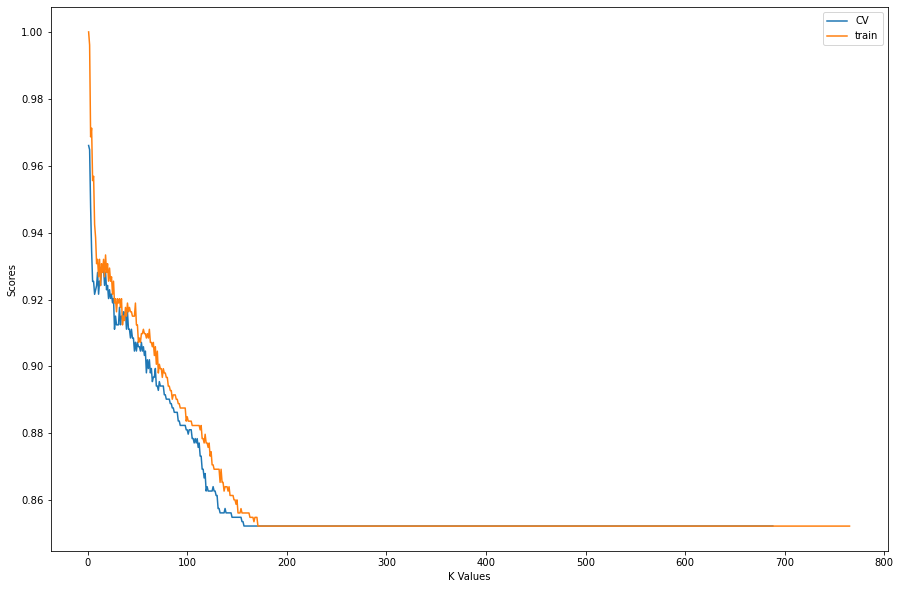

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
scr_max = 0
knn_CV_score_list = []
knn_train_score_list = []

for i in range(1,X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    scoresCV = cross_val_score(knn, X_train, y_train, cv=10).mean()
    knn_CV_score_list.append(scoresCV)
    knn_train_scr = knn.score(X_train,y_train)
    knn_train_score_list.append(knn_train_scr)
    if scoresCV >= scr_max:
        scr_max = scoresCV
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,X_train.shape[0]+1),knn_CV_score_list,label = "CV")
plt.plot(range(1,X_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8487394957983193


### Baseline Model

Best K value =  4
Best score =  0.9555707450444292


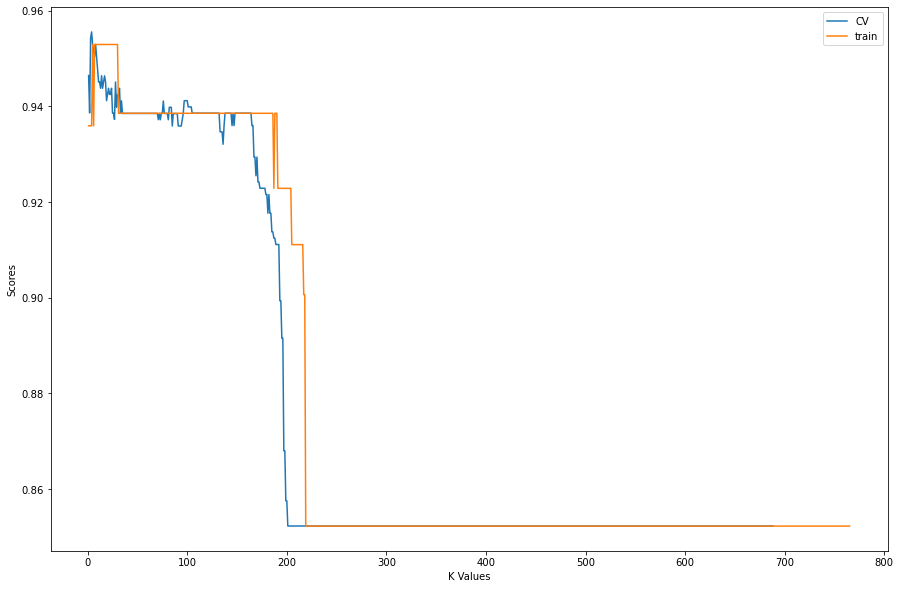

In [80]:
scr_max = 0
knn_CV_score_list = []
knn_train_score_list = []

for i in range(1,X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train[['avg_score']],y_train)
    scoresCV = cross_val_score(knn, X_train[['avg_score']], y_train, cv=10).mean()
    knn_CV_score_list.append(scoresCV)
    knn_train_scr = knn.score(X_train[['avg_score']],y_train)
    knn_train_score_list.append(knn_train_scr)
    if scoresCV >= scr_max:
        scr_max = scoresCV
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,X_train.shape[0]+1),knn_CV_score_list,label = "CV")
plt.plot(range(1,X_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [85]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train[['avg_score']], y_train)
y_pred = knn.predict(X_test[['avg_score']])
print(metrics.accuracy_score(y_test, y_pred))

0.8907563025210085


## Decision Tree

### Baseline Model

In [82]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train[['avg_score']],y_train)
scoresCV = cross_val_score(clf, X_train[['avg_score']], y_train, cv=10)

#Predict the response for test dataset
y_pred = clf.predict(X_train[['avg_score']])
print("Training Score:",metrics.accuracy_score(y_train,y_pred))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))

Training Score: 0.9529411764705882
Cross Vlidation score: 0.94 (+/- 0.05)


In [83]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
scoresCV = cross_val_score(clf, X_train, y_train, cv=10)

#Predict the response for test dataset
y_pred = clf.predict(X_train)
print("Training Score:",metrics.accuracy_score(y_train,y_pred))
print("Cross Vlidation score: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))


Training Score: 1.0
Cross Vlidation score: 0.98 (+/- 0.03)


In [86]:
y_pred = clf.predict(X_test)
print("Testing Score:",metrics.accuracy_score(y_test,y_pred))

Testing Score: 0.9159663865546218


In [87]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

NameError: name 'X_te' is not defined

### Instantiate three models

In [ ]:
from sklearn import linear_model, neighbors, ensemble

In [ ]:
lr_model = linear_model.LogisticRegression(solver="lbfgs", random_state=1)
knn_model = neighbors.KNeighborsClassifier()
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)

models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [ ]:
for model in models:
with open(f"models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)